# CMPUT 200 Winter 2023  Ethics of Data Science and AI

# Assignment 1:  Basic Data Science Methods

In this assignment you will do some basic data analysis.  This assignment is essentially testing your background knowledge.  You should be able to carry out this if you have the course prerequisites.

We will use data on population across the world.  The data we will use is from [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md).


### Instructions
**Deadline.**  This assignment is due at **11:59pm MST on Friday February 10**.  Please check the syllabus for late submissions.

**Reminder.** You must submit your own work.  The collaboration policy for the assignments is Consultation Collaboration. You may verbally discuss concepts with your classmates, without exchanging written text, code, or detailed advice.  You must develop your own solution and submit your own work.  All sources of information used including books, websites, students you talked to, must be cited in the submission.  Please see the course FAQ document for details on this collaboration policy.  We will adhere to current Faculty of Science guidelines on dealing with suspected cases of plagiarism.

You must use this notebook to complete your assignment. You will execute the questions in the notebook. The questions might ask for a short answer in text form or for you to write and execute a piece of code. Make sure you enter your answer in either case only in the cell provided. Do not use a different cell and do not create a new cell. Creating new cells for your code is not compatible with the auto-grading system we are using and thus your assignment will not get grading properly and you will lose marks for that question.

Your submitted notebook should run on our local installation or on the syzygy platform.  So if you are importing packages not listed in the notebook or using local data files not included in the assignment package, make sure the notebook is self-contained.  If we cannot run your notebook, you will lose 50% of the marks, and any additional marks that may be lost due to wrong answers.

### Submission Instructions
When you are done, you will submit your work from the notebook. Make sure to save your notebook before running it, and then submit on eClass the notebook file with your work completed. Name your file with your lastname and the assignment number: Lastname_A1.ipynb



In [ ]:
# Run this cell to set up; Please don't change this cell.

import numpy as np
from numpy.random import default_rng
rng = default_rng()
import pandas as pd
from scipy.optimize import minimize

# These lines do some fancy plotting magic.
import matplotlib
# This is a magic function that renders the figure in the notebook, instead of displaying a dump of the figure object.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


## Part 1:  Population

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.


In this section, we will examine some of the factors that influence population growth and how they are changing around the world.

The first dataframe we will consider is the total population of each country over time. Run the cell below.

In [2]:
population = pd.read_csv('population.csv', header=0)
population.drop(population.index[(population["time"] >= 2021)],axis=0,inplace=True)
population.shape

NameError: name 'pd' is not defined

**Note:** The population csv file can also be found [here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/ddf--datapoints--population_total--by--geo--time.csv). The data for this project was downloaded in April 2020.

### Haiti

In the `population` dataframe, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Haiti. Use the ISO link to find the 3-letter code for Haiti.

**Question 1.** Create a dataframe called `h_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2020 (including both 1970 and 2020) and the second should contain the population of Haiti in each of those years.

In [ ]:
h_pop = population.loc[(population["geo"] == "hti") & (population["time"] >= 1970), ["time", "population_total"]]
h_pop.set_index('time', drop=True)


NameError: name 'population' is not defined

Run the following cell to create a dataframe called `h_decade` that has the population of Haiti for every ten years starting in 1970 and going up to 2020. At a glance, it appears that the population of Haiti has been growing quickly indeed!

In [ ]:
tens = np.arange(1970,2021,10)
h_decade = h_pop.loc[h_pop['time'].isin(tens)]
h_decade.set_index('time',drop=True)



,population_total
time,
1970,4676237
1980,5643175
1990,7037915
2000,8463802
2010,9949318
2020,11402533


**Question 2.** Assign `initial` to an array that contains the population for every ten year interval from 1970 to 2010. Then, assign `changed` to an array that contains the population for every ten year interval from 1980 to 2020. You should use the `h_decade` table to create both arrays, first filtering the table to only contain the relevant years.

The annual growth rate for a time period is equal to:

$$(\frac{\text{Population at end of period}}{\text{Population at start of period}}^{\frac{1}{\text{number of years}}} )-1$$

We have provided the code below that uses  `initial` and `changed` in order to add a column to `h_decade` called `annual_growth`. Don't worry about the calculation of the growth rates; run the test below to test your solution.

If you are interested in how we came up with the formula for growth rates, consult the [growth rates](https://www.inferentialthinking.com/chapters/03/2/1/growth) section of the textbook.


In [ ]:
# For both the initial and changed arrays, filter the table such that it only includes the pertinent years:
initial_data = h_decade[(h_decade['time'] >= 1970) & (h_decade['time'] <= 2010)]
changed_data = h_decade[(h_decade['time'] >= 1980) & (h_decade['time'] <= 2020)]

# Create initial and changed arrays
initial = np.array(initial_data['population_total'])
changed = np.array(changed_data['population_total'])

# Calculating Growth Rates
growth_rates = ((changed/initial)**0.1)-1


# Filter the table to contain only the relevant years for growth rates 1970 to 2010
h_1970_through_2010 = h_decade.loc[h_decade['time'] <= 2010]
# Add a new column 'annual_growth' to the 'h_1970_through_2010' table
h_decade_growth = h_1970_through_2010.assign(annual_growth = growth_rates)

h_1970_through_2010
h_decade_growth


,time,population_total,annual_growth
23046,1970,4676237,0.018973
23056,1980,5643175,0.022332
23066,1990,7037915,0.018620
23076,2000,8463802,0.016302
23086,2010,9949318,0.013727


While the population has grown every decade since 1970, the annual growth rate decreased dramatically from 1980 to 2020. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional dataframes of measurements about countries over time.

In [ ]:
life_expectancy = pd.read_csv('life_expectancy.csv', header=0)
life_expectancy.drop(life_expectancy.loc[life_expectancy['time'] >= 2021].index, inplace=True)

child_mortality = pd.read_csv('child_mortality.csv', header=0)
child_mortality.drop(child_mortality.loc[child_mortality['time'] >= 2021].index, inplace=True)
child_mortality.rename(columns={"child_mortality_0_5_year_olds_dying_per_1000_born":"child_mortality_under_5_per_1000_born"}, inplace=True)

fertility = pd.read_csv('fertility.csv', header=0)
fertility.drop(fertility.loc[fertility['time'] >= 2021].index, inplace=True)


The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as they will be helpful for answering further questions!

In [ ]:
life_expectancy

,geo,time,life_expectancy_years
0,afg,1800,28.21
1,afg,1801,28.20
2,afg,1802,28.19
3,afg,1803,28.18
4,afg,1804,28.17
...,...,...,...
56045,zwe,2016,60.52
56046,zwe,2017,61.35
56047,zwe,2018,61.74
56048,zwe,2019,62.04


In [ ]:
child_mortality

,geo,time,child_mortality_under_5_per_1000_born
0,afg,1800,468.58
1,afg,1801,468.58
2,afg,1802,468.58
3,afg,1803,468.58
4,afg,1804,468.58
...,...,...,...
57412,zwe,2016,50.36
57413,zwe,2017,49.31
57414,zwe,2018,46.23
57415,zwe,2019,44.43


In [ ]:
fertility

,geo,time,children_per_woman_total_fertility
0,abw,1800,5.64
1,abw,1801,5.64
2,abw,1802,5.64
3,abw,1803,5.64
4,abw,1804,5.64
...,...,...,...
60630,zwe,2016,3.76
60631,zwe,2017,3.68
60632,zwe,2018,3.61
60633,zwe,2019,3.53


**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Haiti.

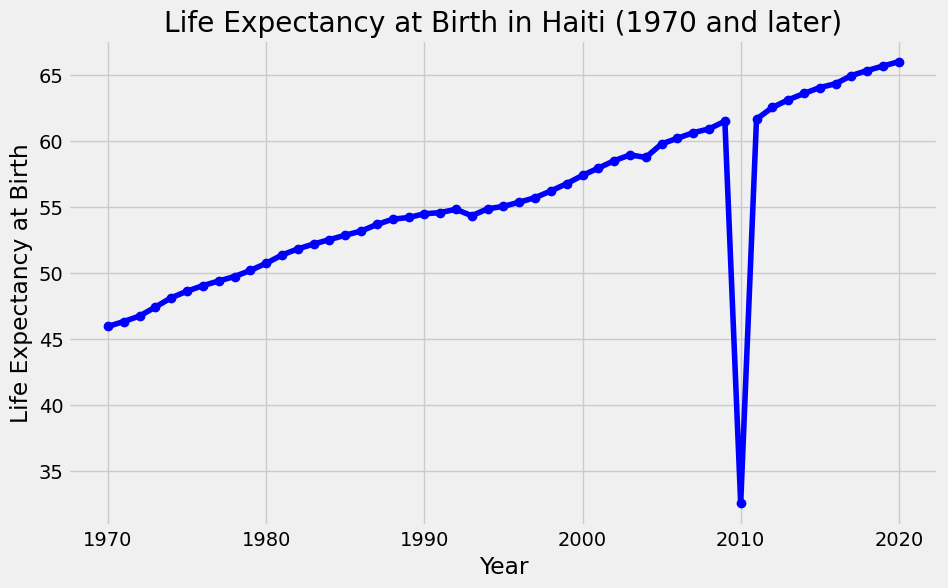

In [ ]:
#Fill in code here
import matplotlib.pyplot as plt

# Assuming life_expectancy is your DataFrame containing the 'geo', 'time', and 'life_expectancy_years' columns
# Replace 'life_expectancy' with the actual DataFrame name

# Filter the table for Haiti and years 1970 and later
haiti_life_expectancy = life_expectancy[(life_expectancy['geo'] == 'hti') & (life_expectancy['time'] >= 1970)]

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(haiti_life_expectancy['time'], haiti_life_expectancy['life_expectancy_years'], marker='o', linestyle='-', color='b')

# Set plot labels and title
plt.title('Life Expectancy at Birth in Haiti (1970 and later)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth')

# Show the plot
plt.grid(True)
plt.show()




**Question 4.** Assuming everything else stays the same, do the trends in life expectancy in the graph above directly explain why the population growth rate decreased from 1980 to 2020 in Haiti? Why or why not?

Hint: What happened in Haiti in 2010, and does that event explain the overall change in population growth rate?

*It is conceivable that alterations in life expectancy may not directly explain the diminishing population growth rate in Haiti from 1980 to 2020, assuming everything else stays the same.*

*While life expectancy significantly influences population dynamics, other factors such as significant events like the 2010 earthquake play crucial roles. Catastrophic events can lead to population decline due to increased mortality rates and the displacement of individuals. The 2010 earthquake likely impacted both the size and growth rate of the population.*

*The earthquake in Haiti in 2010 can lead to a sudden decline in life expectancy due to increased mortality, injuries, and other health-related issues. Therefore, the trends in life expectancy, particularly the drastic drop in 2010, could indeed explain the overall change in the population growth rate in Haiti during that period. The impact of such a catastrophic event on the population's well-being and demographic factors could contribute to a significant decrease in the population growth rate in the aftermath of the earthquake. *

*A rise in average life expectancy over time from 1980 to 2020 might potentially contribute to a reduced population growth rate, as individuals live longer, resulting in a slower rate of replacement.*


The `fertility` data contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49.

**Question 5.** Write a function `fertility_over_time` that takes the Alpha-3 code of a `country` and a `start` year. It returns a two-column dataframe with labels `Year` and `Children per woman` that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table.


In [ ]:
def fertility_over_time(country, start):
    """Create a two-column dataframe that describes a country's total fertility rate each year."""
    # Filter the table for the specified country and start year
    country_fertility = fertility[(fertility['geo'] == country) & (fertility['time'] >= start)]

    # Extract relevant columns and create a new DataFrame
    country_fertility_after_start = country_fertility[['time', 'children_per_woman_total_fertility']]

    # Rename columns for consistency
    cleaned_table = country_fertility_after_start.rename(columns={'time': 'Year', 'children_per_woman_total_fertility': 'Children per woman'})
    return cleaned_table



df=fertility_over_time('hti', 1970)
df

,Year,Children per woman
24464,1970,5.76
24465,1971,5.69
24466,1972,5.64
24467,1973,5.62
24468,1974,5.61
24469,1975,5.64
24470,1976,5.70
24471,1977,5.78
24472,1978,5.87
24473,1979,5.97


* **bold text**Then*, in the next cell, call your `fertility_over_time` function on the Alpha-3 code for *Haiti* and the year 1970 in order to plot how Haiti's fertility rate has changed since 1970. Note that the function `fertility_over_time` should not return the plot itself. **The expression that draws the line plot is provided for you; please don't change it.**

<Axes: xlabel='Year'>

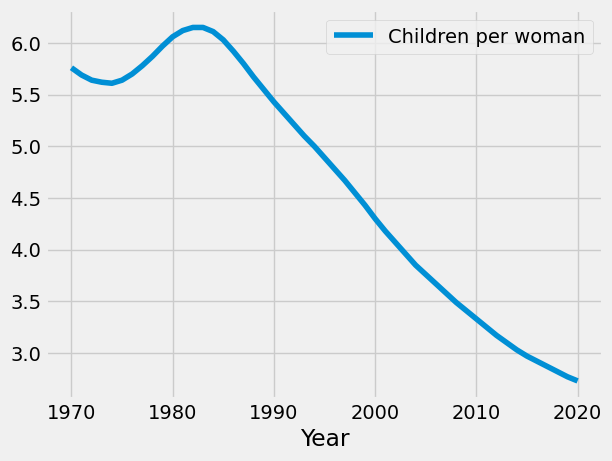

In [ ]:
haiti_code = 'hti'
fertility_over_time(haiti_code, 1970).plot(0, 1) # You should *not* change this line.

**Question 6.** Assuming everything else is constant, do the
trends in fertility in the graph above help directly explain why the population
growth rate decreased from 1980 to 2020 in Haiti? Why or why not?





*The chart demonstrates a steady decline in fertility rates (the number of children per woman) from 1980 to 2020. This decline corresponds with a reduction in child mortality rates during the same period, it may directly play a role in elucidating the decrease in the population growth rate. A decrease in fertility rates usually results in a slower population growth since there are fewer new births.*

*Nevertheless, it is crucial to take into account other elements that could affect population growth such as the peak in the 80s. Additionally, natural disater, immigration and other major events can influence trends in population dynamics.*






It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Haiti by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 7.** Using both the `fertility` and `child_mortality` data, draw a scatter diagram that has Haiti's total fertility on the horizontal axis and its child mortality on the vertical axis with one point for each year, starting with 1970.

**The expression that draws the scatter diagram is provided for you; please don't change it.** Instead, create a dataframe called `post_1969_fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. Use the label `Children per woman` to describe total fertility and the label `Child deaths per 1000 born` to describe child mortality.

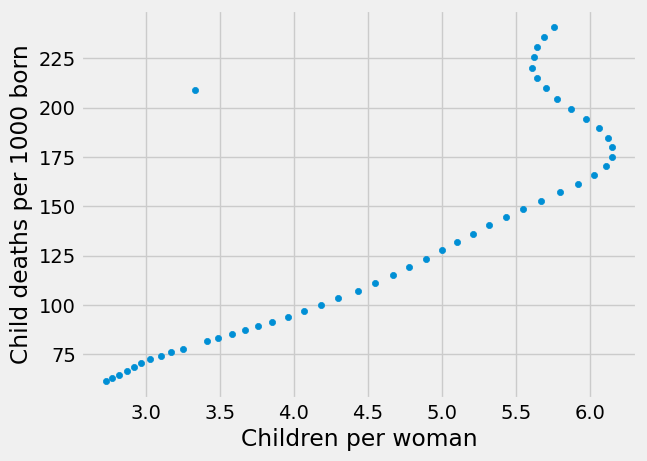

In [ ]:
# Extract Haiti's fertility data
hti_fertility = fertility[(fertility['geo'] == 'hti') & (fertility['time'] >= 1970)][['time', 'children_per_woman_total_fertility']]
hti_fertility = hti_fertility.rename(columns={'time': 'Year', 'children_per_woman_total_fertility': 'Children per woman'})

# Extract Haiti's child mortality data
hti_child_mortality = child_mortality[(child_mortality['geo'] == 'hti') & (child_mortality['time'] >= 1970)][['time', 'child_mortality_under_5_per_1000_born']]
hti_child_mortality = hti_child_mortality.rename(columns={'time': 'Year', 'child_mortality_under_5_per_1000_born': 'Child deaths per 1000 born'})

# Merge the two dataframes on the 'Year' column
fertility_and_child_mortality = pd.merge(hti_fertility, hti_child_mortality, on='Year')

# Assign the merged dataframe to the specified variable
post_1969_fertility_and_child_mortality = fertility_and_child_mortality

post_1969_fertility_and_child_mortality.plot.scatter('Children per woman', 'Child deaths per 1000 born')
plt.show()


**Question 8.** In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality causes parents to choose to have fewer children? Beyond the general association, are there any irregularities or odd points that would be worth investigating?



*The scatter diagram illustrates an inverse association between total fertility (children per woman) and child mortality in Haiti, suggesting that as child mortality decreases, there is a tendency for parents to have fewer children. However, it's essential to investigate any irregularities or outliers in the data that deviate from this general trend, as they may indicate specific factors influencing fertility or child mortality independently. Beyond the general association, there is an outlier at 3.5 children per woman and 213 child deaths per 1000 born. It indicates an anomaly in the dataset due to the earthquake that increased the child deaths per 1000 born.*

<Axes: xlabel='Year', ylabel='Child deaths per 1000 born'>

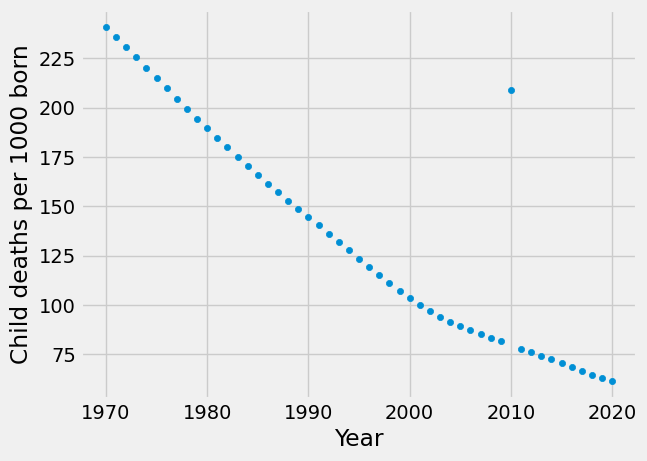

In [ ]:
# Don't change this line!
post_1969_fertility_and_child_mortality.plot.scatter('Year', 'Child deaths per 1000 born')

**Question 9.** Using our knowledge that historical factors may affect Haiti's population, we decide to plot the child mortality rate per 1000 born against time, as seen in the scatter plot above. The y-axis remains the same as the plot from 1.8, but we are now plotting against time rather than the number of children per woman. Does this new visualization give us a better understanding of the outlier in 1.8?

*Since the outlier coincides with the mentioned 2010 earthquake, it would strengthen the hypothesis that the anomaly in child mortality is related to that historical occurrence. The number of child deaths per 1000 births is approximately 213 for the outlier.*

References

1. [Data8](https://data8.org)
2. [Data 100](https://ds100.org)